In [5]:
import numpy as np
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

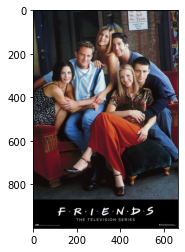

In [41]:
img = cv2.imread(r'C:\Users\M433IA\DL\friends.jpg',1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )   
plt.imshow(img)
plt.show()

#### face detection 

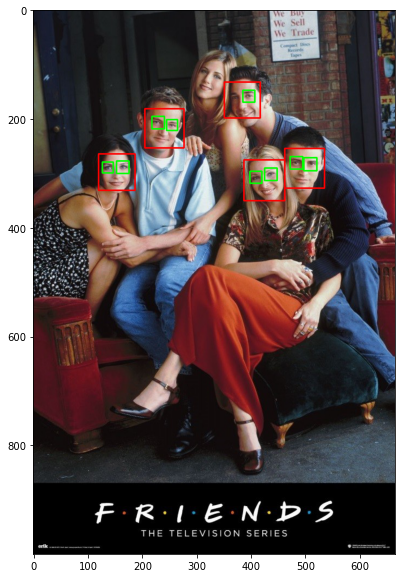

[[351 132  66  66]
 [387 275  75  75]
 [205 181  72  72]
 [462 254  73  73]
 [120 264  67  67]]


In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(r'C:\Users\M433IA\anaconda3\Library\etc\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\M433IA\anaconda3\Library\etc\haarcascades\haarcascade_eye.xml')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

### cat face detection 

In [59]:
cat_cascade = cv2.CascadeClassifier(r'C:\Users\M433IA\anaconda3\Library\etc\haarcascades\haarcascade_frontalcatface.xml')
cat_ext_cascade = cv2.CascadeClassifier(r'C:\Users\M433IA\anaconda3\Library\etc\haarcascades\haarcascade_frontalcatface_extended.xml')

In [60]:
SF=1.05  # try different values of scale factor like 1.05, 1.3, etc
N=3 

In [69]:
def processImage(image):
    # read the image
    img = image
    # convery to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # this function returns tuple rectangle starting coordinates x,y, width, height
    cats = cat_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    #print(cats) # one sample value is [[268 147 234 234]]
    cats_ext = cat_ext_cascade.detectMultiScale(gray, scaleFactor=SF, minNeighbors=N)
    #print(cats_ext)
    
    # draw a blue rectangle on the image
    for (x,y,w,h) in cats:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)       
    # draw a green rectangle on the image 
    for (x,y,w,h) in cats_ext:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
    # save the image to a file
    cv2.imwrite('out.jpg',img)

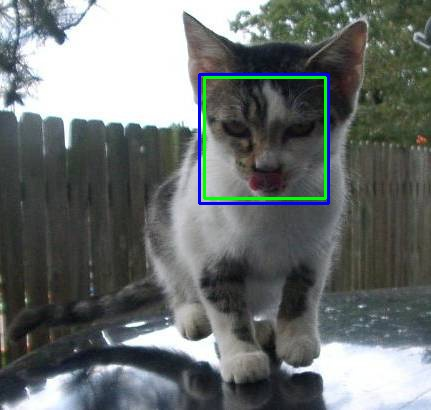

In [75]:
from IPython.display import Image
img = cv2.imread(r'C:\Users\M433IA\DL\cats\cat.11.jpg',1)  

processImage(img) 
Image(filename='out.jpg')